In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

### Reading Data

In [8]:
pd.set_option('max_colwidth', 800)
data = pd.read_csv('./../Week5/WDI - Dataset/Indicators.csv', sep=',')
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [10]:
# Getting Useful Information
print(data.shape)
print(data['Year'].min(), data['Year'].max())
print(data['IndicatorName'].unique().shape)

(5656458, 6)
1960 2015
(1344,)


In [26]:
len(data[data['CountryCode'].str.contains('IND') & data['IndicatorName'].str.contains('Hospital')].index)

12

In [30]:
IndHos = data[data['CountryCode'].str.contains('IND') & data['IndicatorName'].str.contains('Hospital')]
IndHos

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11659,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,0.458987
329121,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1970,0.604500
674155,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1975,0.588200
1051576,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1980,0.769700
1134666,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1981,0.769400
1476641,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1985,0.769200
1653092,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1987,0.718200
2054964,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1991,0.787000
3550767,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2002,0.690000
3705007,India,IND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2003,0.900000


In [31]:
IndHos['Value'].mean()

0.7212655749971214

In [63]:
# Find Country With Max average 'SH.MED.BEDS.ZS' values over years
MaxMean = 0
MaxCountry = ''

CountryCodes = data['CountryCode'].unique().tolist()

for i in CountryCodes:
    Beds = data[data['CountryCode'].str.contains(i)]
    
    if Beds['IndicatorName'].str.contains('Hospital').any():
        mean = Beds[Beds['IndicatorName'].str.contains('Hospital')]['Value'].mean()
        if mean > MaxMean:
            MaxMean = mean
            MaxCountry = i
        else:
            pass
    else:
        pass
    
print(MaxMean, MaxCountry)

17.923139907836223 MCO


In [64]:
# Find Country With Mix average 'SH.MED.BEDS.ZS' values over years
MinMean = 100
MinCountry = ''

CountryCodes = data['CountryCode'].unique().tolist()

for i in CountryCodes:
    Beds = data[data['CountryCode'].str.contains(i)]
    
    if Beds['IndicatorName'].str.contains('Hospital').any():
        mean = Beds[Beds['IndicatorName'].str.contains('Hospital')]['Value'].mean()
        if mean < MinMean:
            MinMean = mean
            MinCountry = i
        else:
            pass
    else:
        pass
    
print(MinMean, MinCountry)

0.2977990905957085 NER


In [67]:
check1 = data[data['IndicatorName'].str.contains('Hospital') & data['CountryCode'].str.contains(MaxCountry)]
check2 = data[data['IndicatorName'].str.contains('Hospital') & data['CountryCode'].str.contains(MinCountry)]
check2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16566,Niger,NER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,0.409491
342549,Niger,NER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1970,0.494700
689811,Niger,NER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1975,0.495300
1672287,Niger,NER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1987,0.543900
2448008,Niger,NER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1994,0.194600


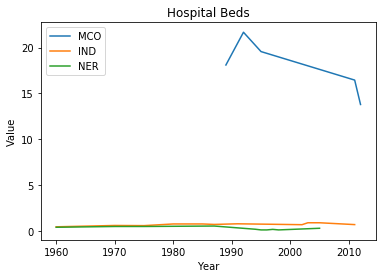

In [71]:
fig = plt.figure()

year = check1['Year'].values
value = check1['Value'].values

year2 = IndHos['Year'].values
value2 = IndHos['Value'].values

year3 = check2['Year'].values
value3 = check2['Value'].values

ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax1.plot(year, value, label=MaxCountry)
ax1.plot(year2, value2, label='IND')
ax1.plot(year3, value3, label=MinCountry)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Hospital Beds')

plt.legend()
plt.show()

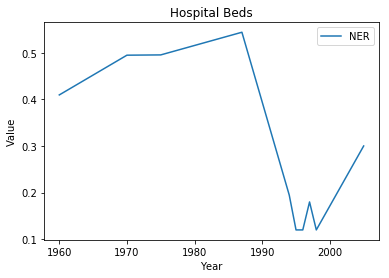

In [70]:
fig = plt.figure()

# year = check1['Year'].values
# value = check1['Value'].values

# year2 = IndHos['Year'].values
# value2 = IndHos['Value'].values

year3 = check2['Year'].values
value3 = check2['Value'].values
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
# ax1.plot(year, value, label=MaxCountry)
# ax1.plot(year2, value2, label='IND')
ax1.plot(year3, value3, label=MinCountry)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Hospital Beds')

plt.legend()
plt.show()

# 